### Import Relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from mrmr import mrmr_regression
from sklearn.preprocessing import MinMaxScaler






### Data Analysis and Features selection

In [2]:
patient_141 = pd.read_csv('Patient 141_data.csv')

In [3]:
patient_141.describe()

,hm_mode0,hm_mode1,hm_mode2,hm_mode3,hm_mode4,hc_mode0,hc_mode1,hc_mode2,hc_mode3,hc_mode4,...,Disp_mode1,Disp_mode2,Disp_mode3,Disp_mode4,dispm_mode0,dispm_mode1,dispm_mode2,dispm_mode3,dispm_mode4,BIS
count,3925.000000,3925.000000,3925.000000,3925.000000,3925.000000,3925.000000,3925.000000,3925.000000,3925.000000,3925.000000,...,3925.000000,3925.000000,3925.000000,3925.000000,3925.000000,3925.000000,3925.000000,3925.000000,3925.000000,3925.000000
mean,0.027344,0.186957,0.555136,1.159330,1.437796,8.699996,1.490296,1.046295,1.013680,1.005233,...,1.734773,1.854257,2.008506,2.031457,0.868214,1.447202,2.015475,2.036357,1.968387,45.774140
std,0.005294,0.010896,0.011329,0.011565,0.007401,3.788352,0.206626,0.019007,0.001915,0.000996,...,0.028178,0.018930,0.009212,0.019089,0.050839,0.026488,0.006371,0.001382,0.003779,12.470369
min,0.005367,0.122029,0.496227,1.122106,1.344139,4.269056,0.976548,1.029050,1.007950,1.003612,...,1.569271,1.813155,1.979441,1.909257,0.357394,1.292445,1.980816,2.030857,1.953903,25.700000
25%,0.023842,0.184239,0.550944,1.151399,1.433477,6.730620,1.404234,1.034579,1.012346,1.004742,...,1.723726,1.842306,2.002032,2.024248,0.852101,1.435940,2.011494,2.035449,1.966162,37.300000
50%,0.026069,0.188873,0.554440,1.156248,1.436062,7.577316,1.429896,1.038726,1.013860,1.005200,...,1.737842,1.851773,2.008855,2.036448,0.866145,1.449615,2.015715,2.036336,1.968451,41.700000
75%,0.029843,0.193358,0.560710,1.162948,1.439253,8.691369,1.483461,1.050379,1.014804,1.005552,...,1.751914,1.862276,2.015605,2.043430,0.888479,1.463217,2.019738,2.037308,1.970857,50.200000
max,0.044843,0.206445,0.600746,1.210362,1.463917,48.213529,4.068875,1.173014,1.046101,1.044436,...,1.788541,1.941944,2.032148,2.062564,0.985329,1.501087,2.035897,2.040794,1.980692,93.200000


In [4]:
X=patient_141.drop('BIS', axis=1)
y= patient_141['BIS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear regression

In [5]:
metrics = {}
def plot_regression(data, column):
    
    global metrics
    
    X = data[column].values.reshape(-1, 1)
    #X = X[:, np.newaxis]
    y = data['BIS']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Perform regression
    reg = LinearRegression(n_jobs=-1).fit(X_train_scaled, y_train)
    
    # Predictions
    y_predicted = reg.predict(X_test_scaled)
    
    # Show the score and r2
    #mse = mean_squared_error(y, y_predicted)
    r2 = r2_score(y_test, y_predicted)
    
    # keep track of metrics
    
    #metrics["{}_mse".format(column)] = mse
    metrics["{}_r2".format(column)] = r2
    
    
    
    # Plot the graph#
    plt.figure(figsize=(8,6))
    plt.scatter(data[column], data['BIS'], label="data", c="blue")
    plt.plot(X_test, y_predicted, label="Regression", c="red")
    plt.xlabel(column)
    plt.ylabel('BIS')
    plt.legend(loc="upper left")
    plt.show()

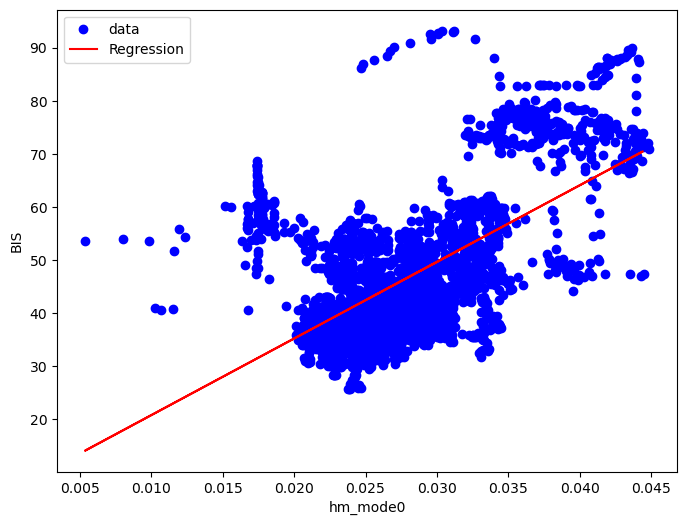

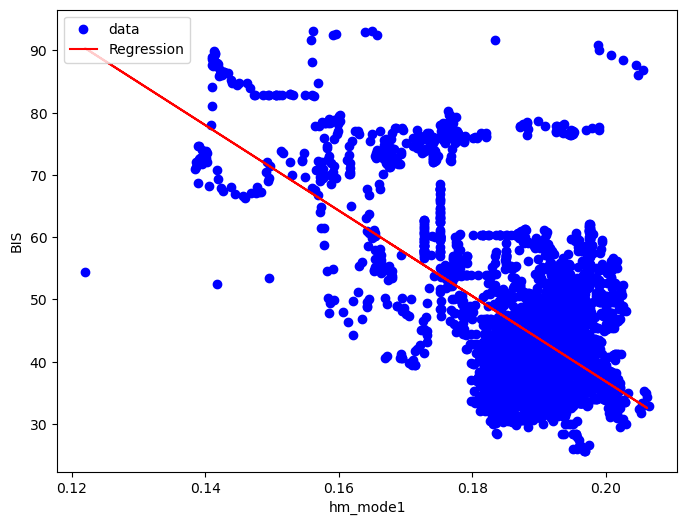

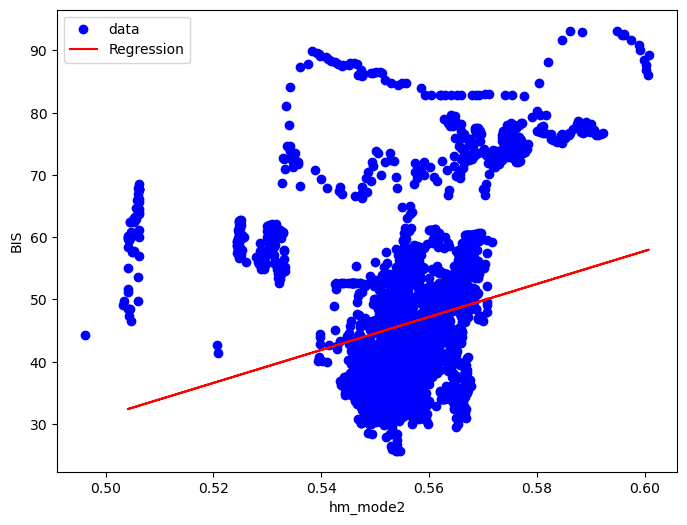

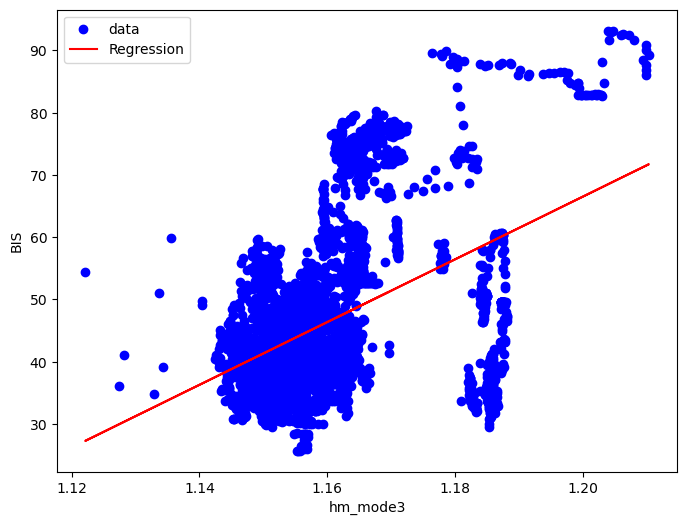

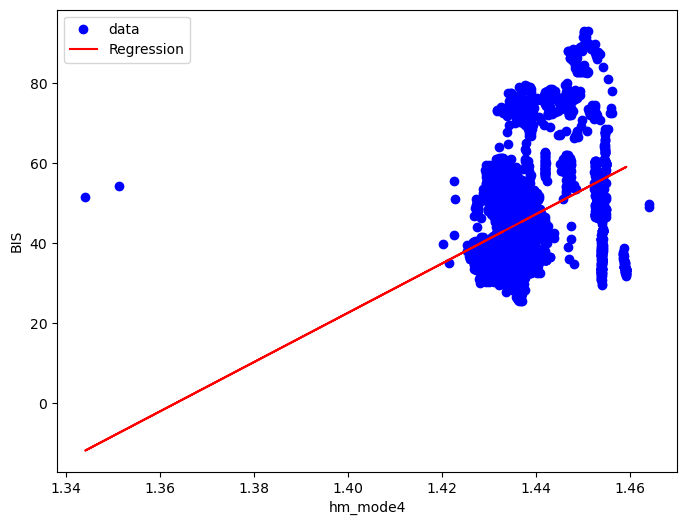

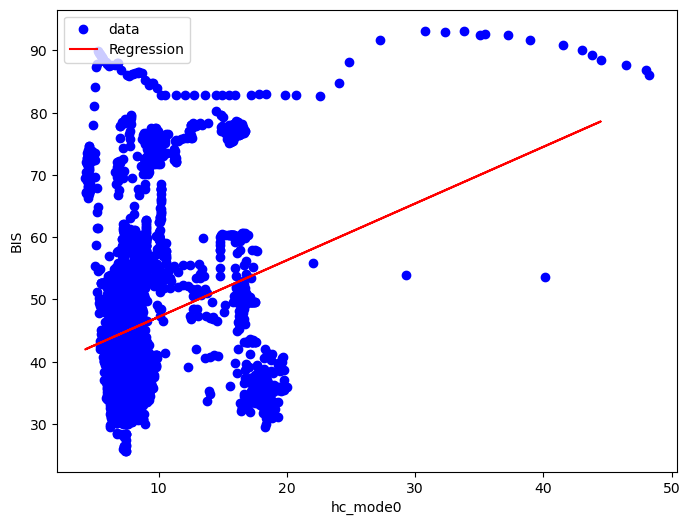

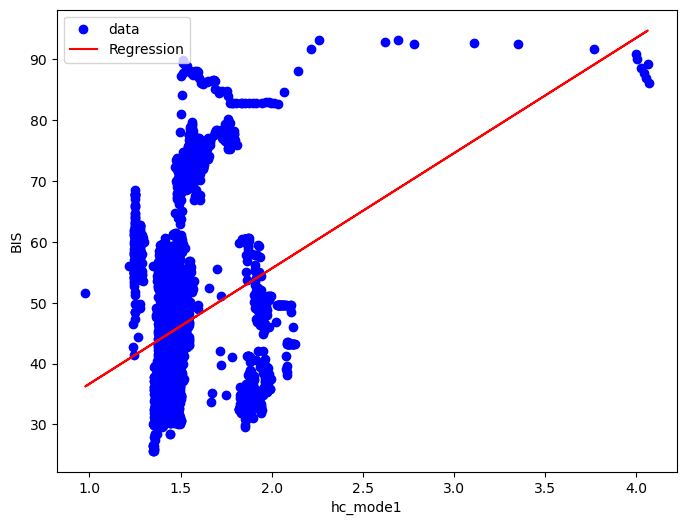

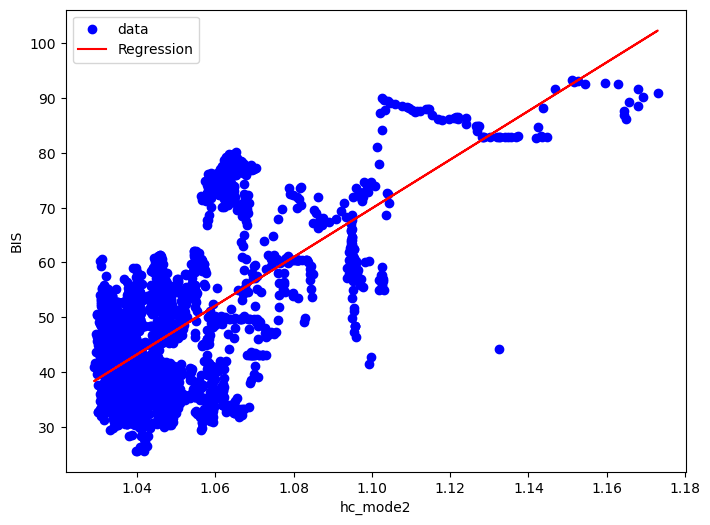

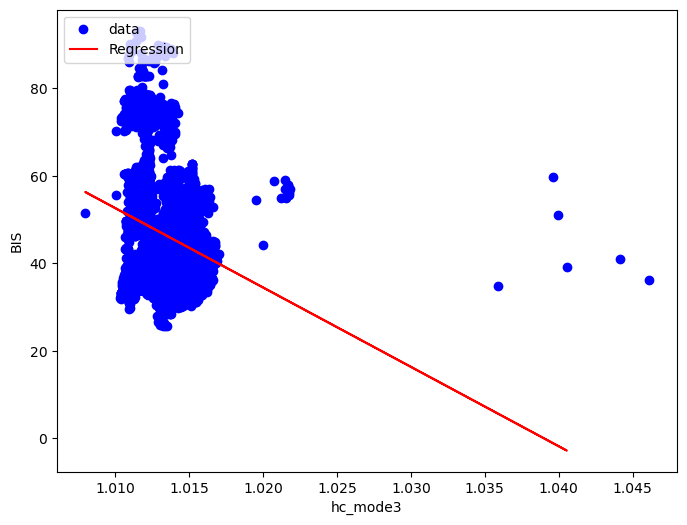

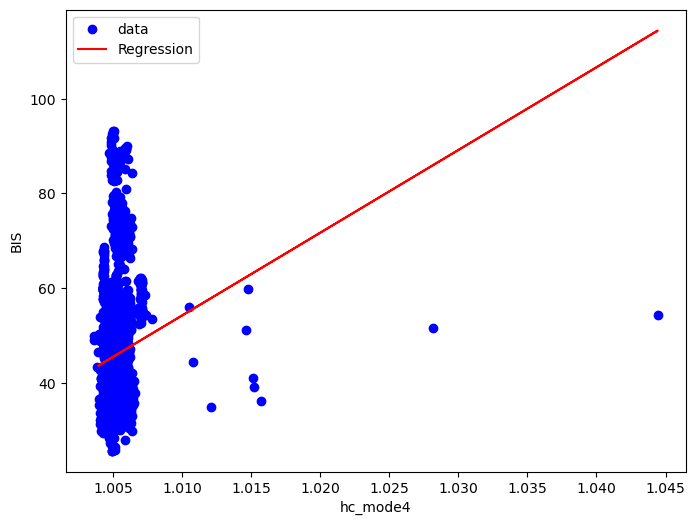

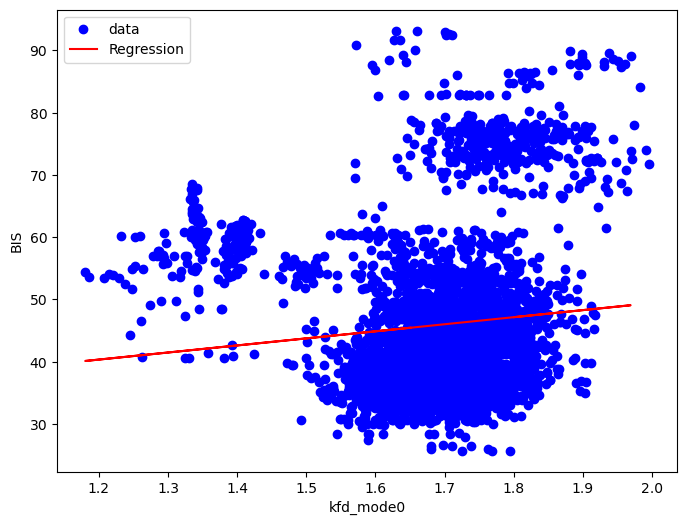

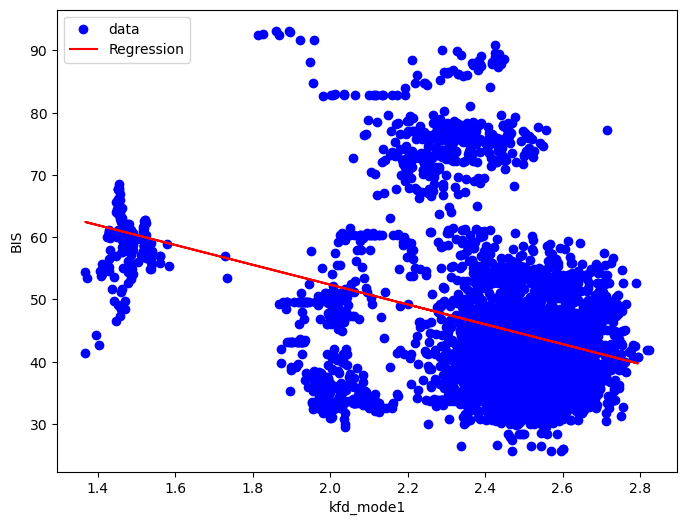

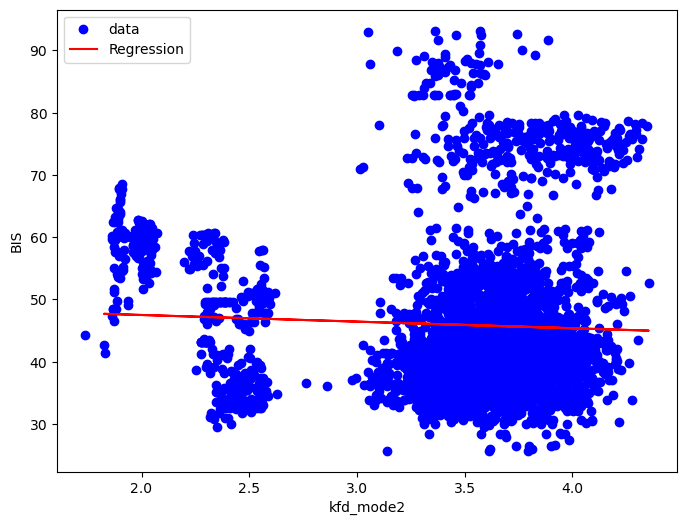

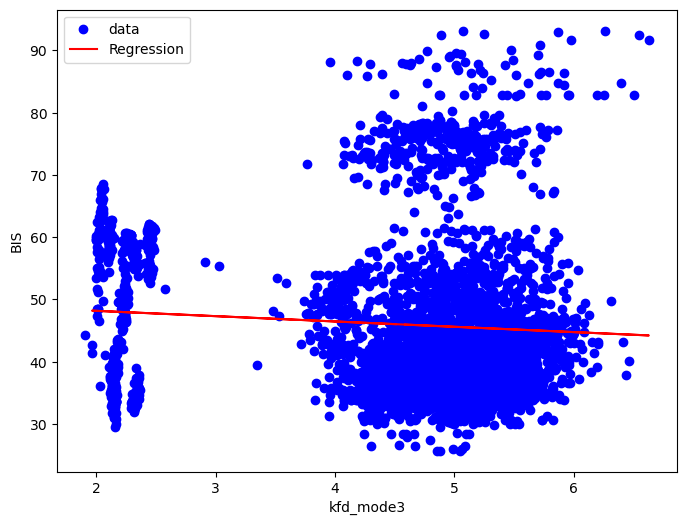

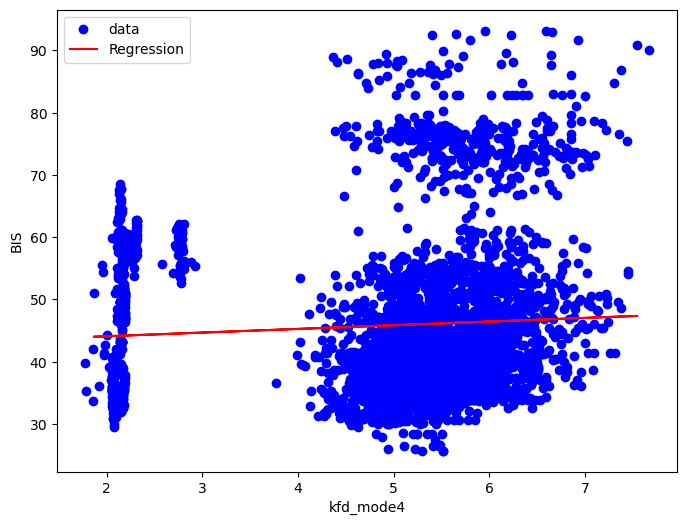

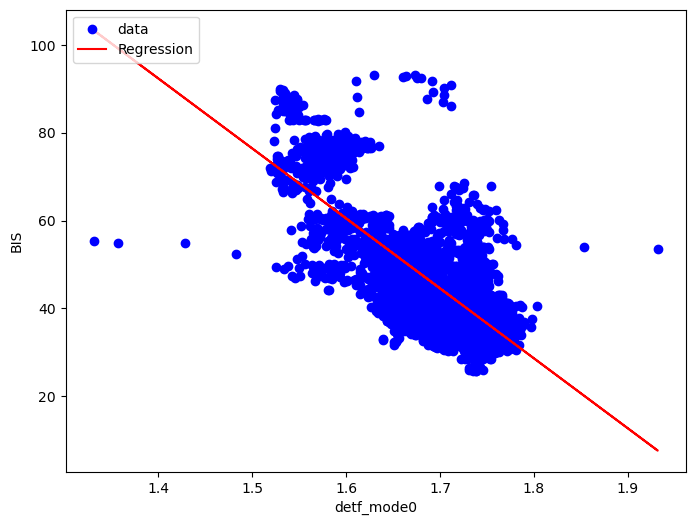

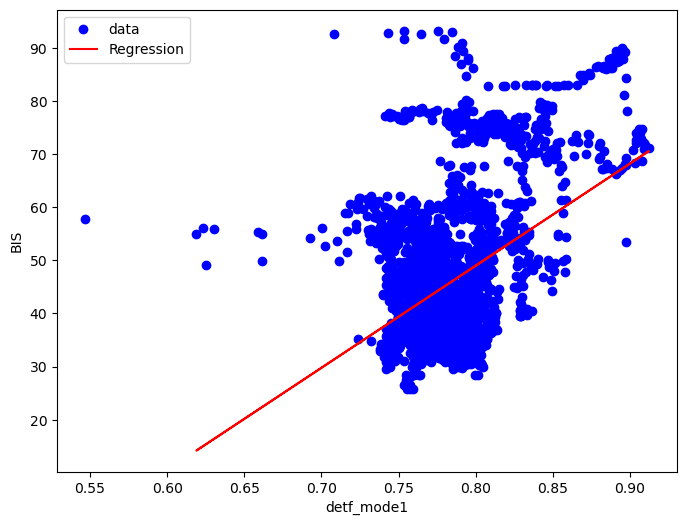

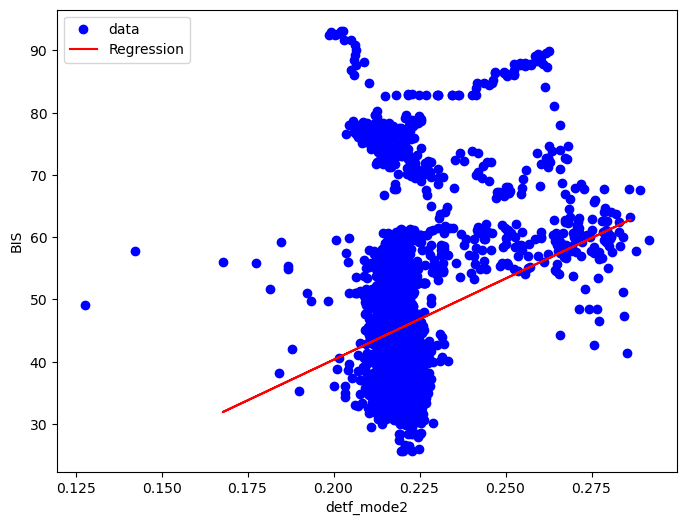

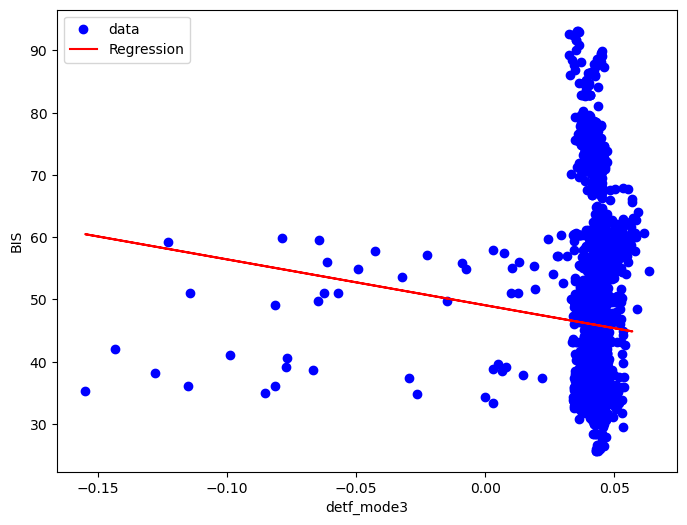

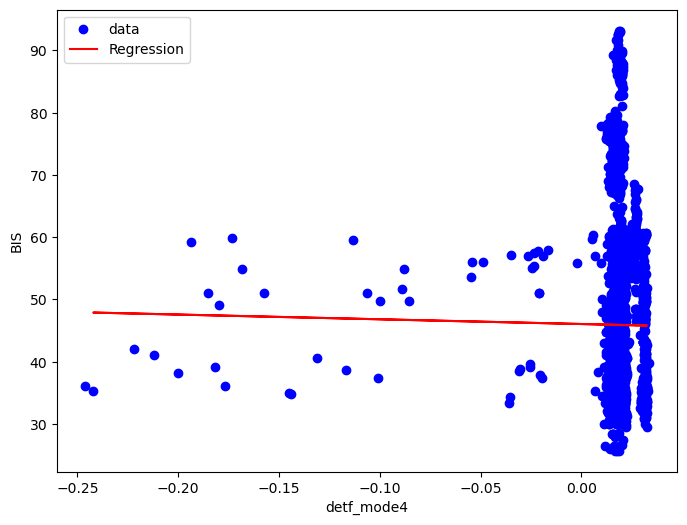

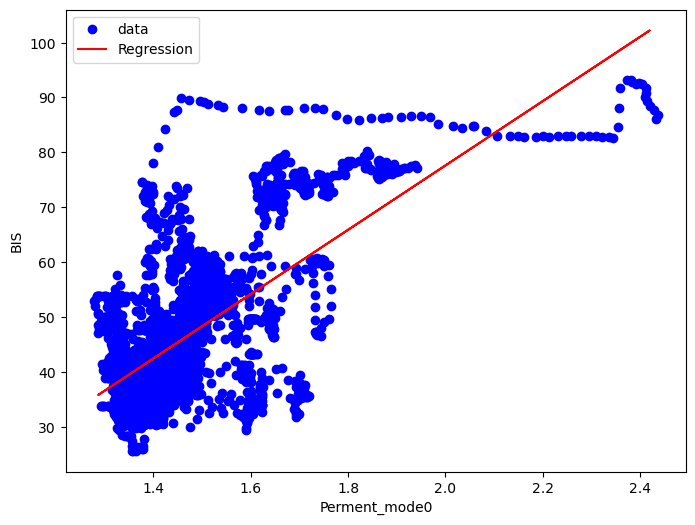

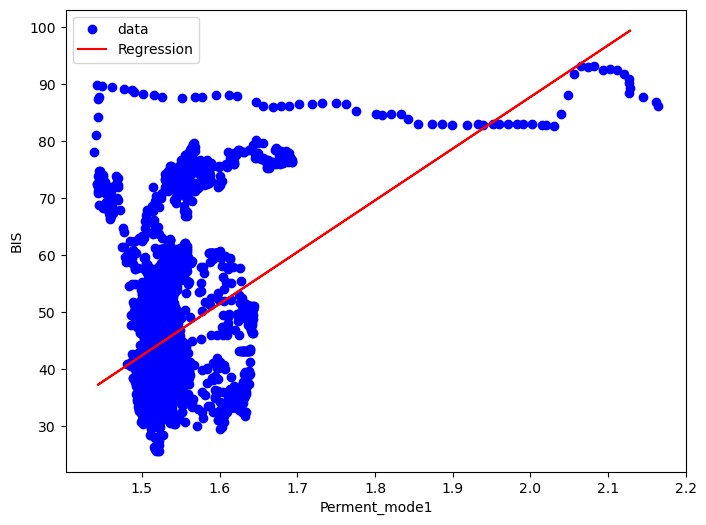

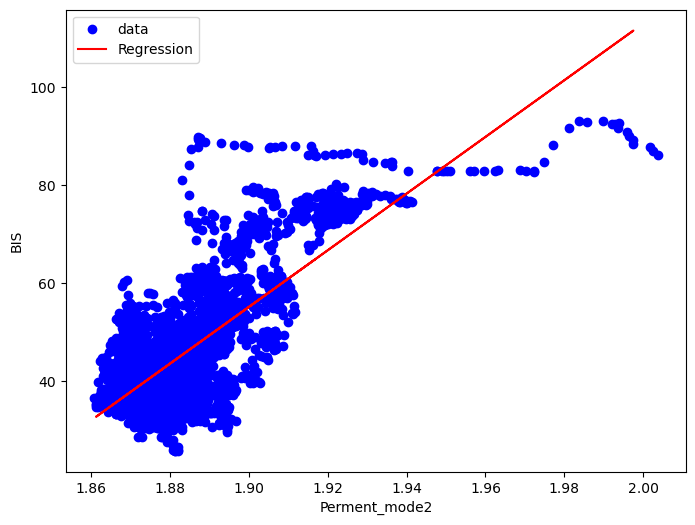

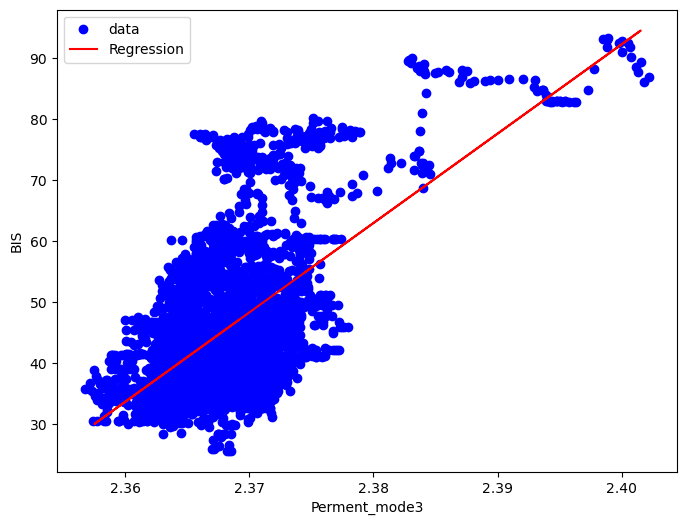

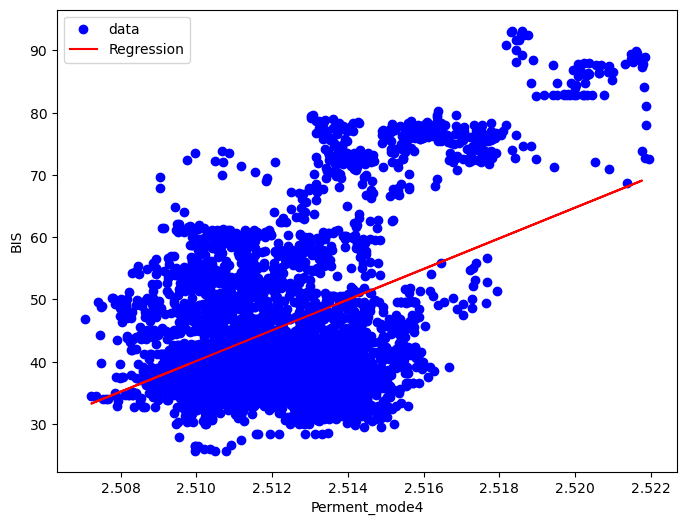

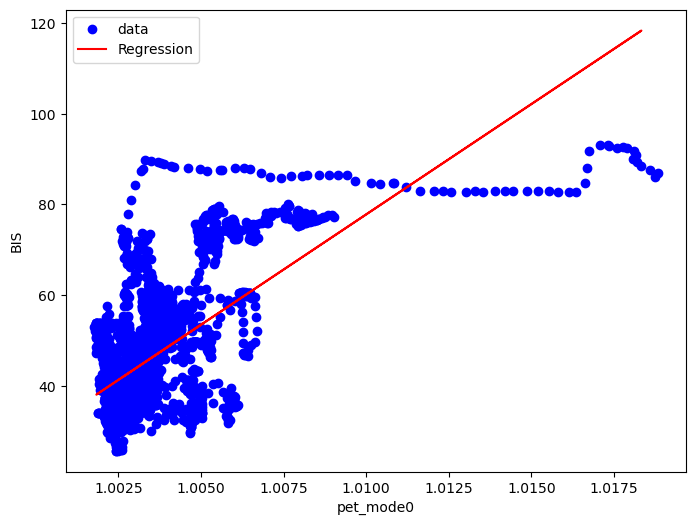

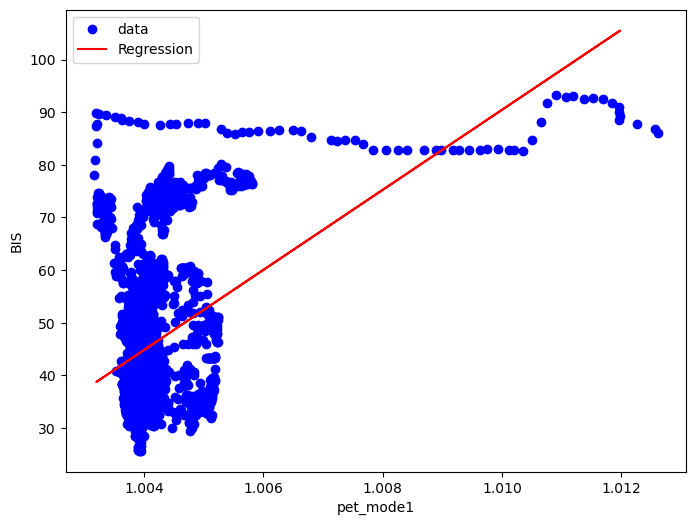

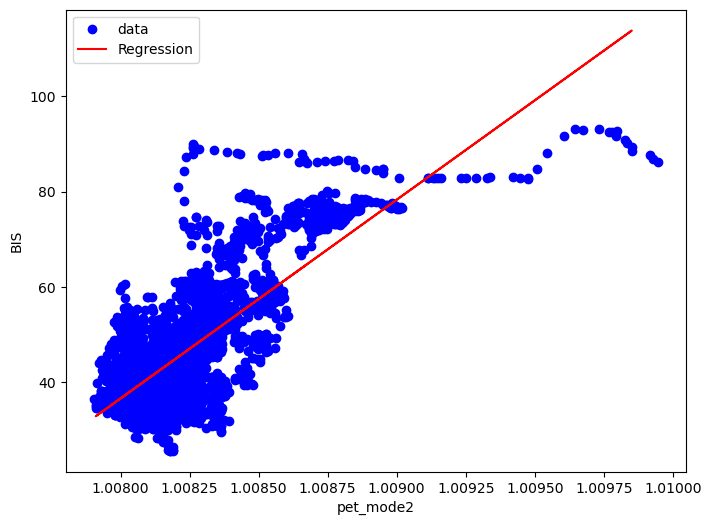

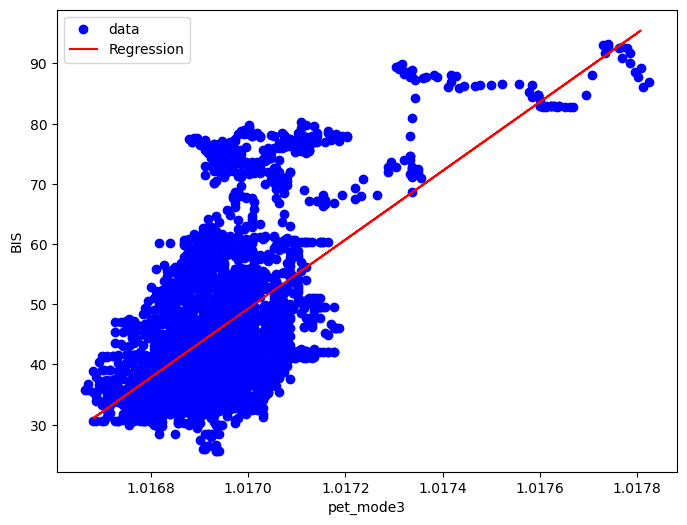

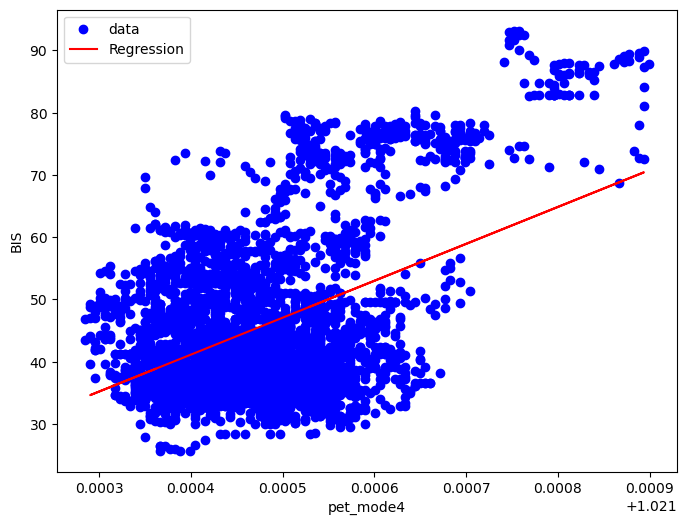

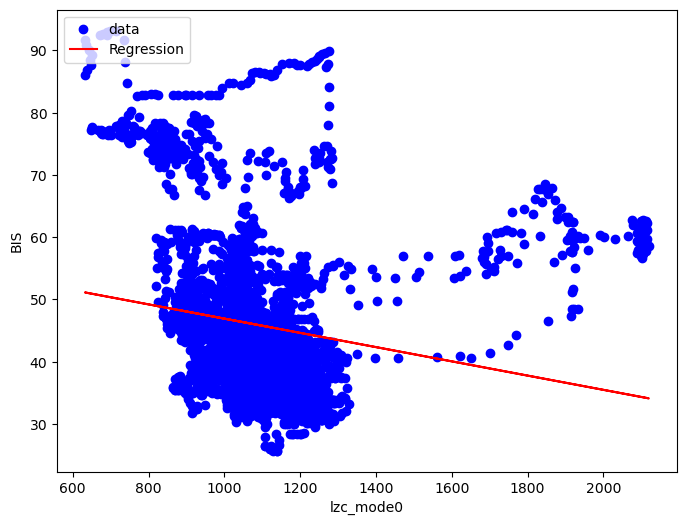

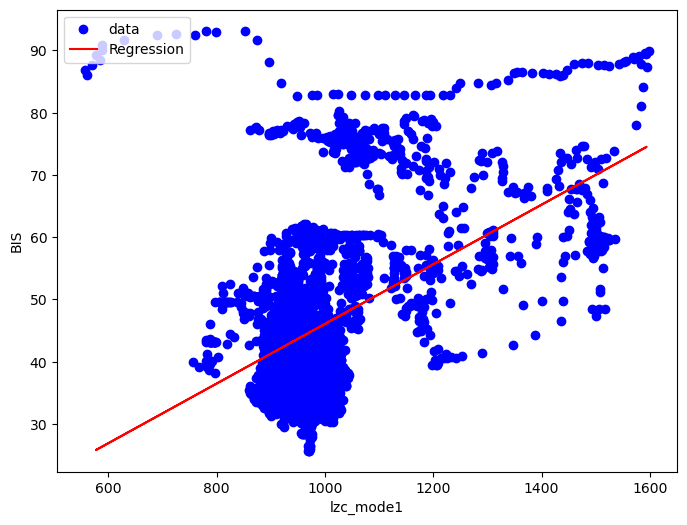

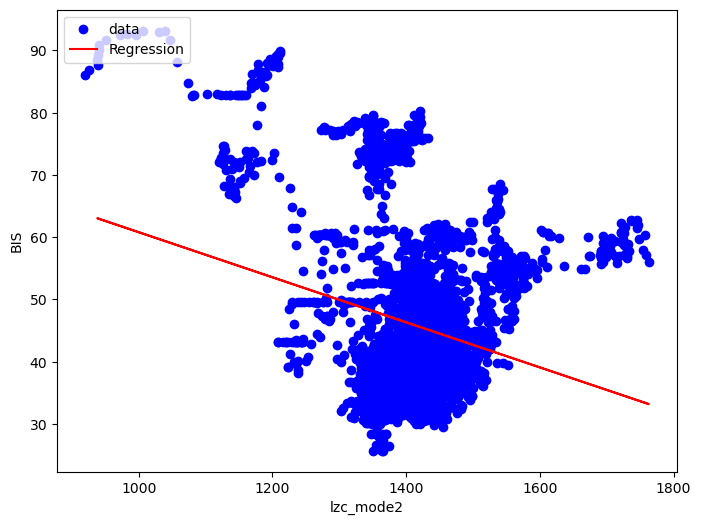

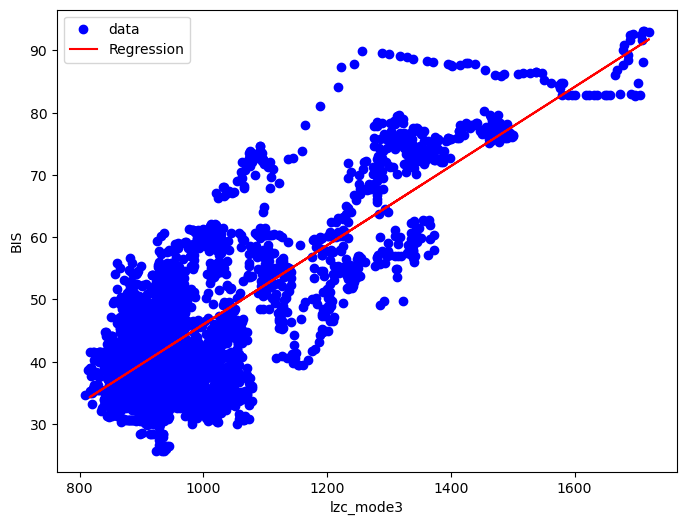

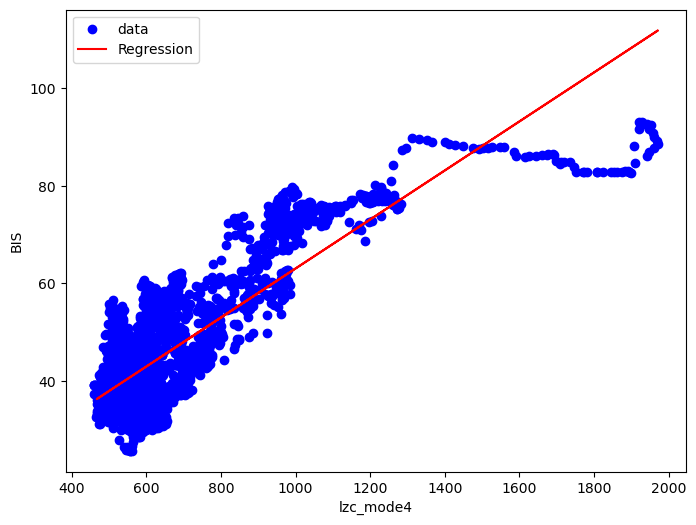

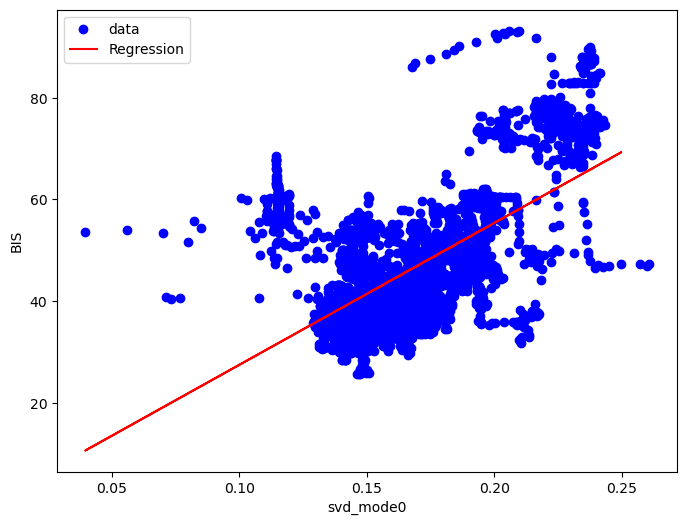

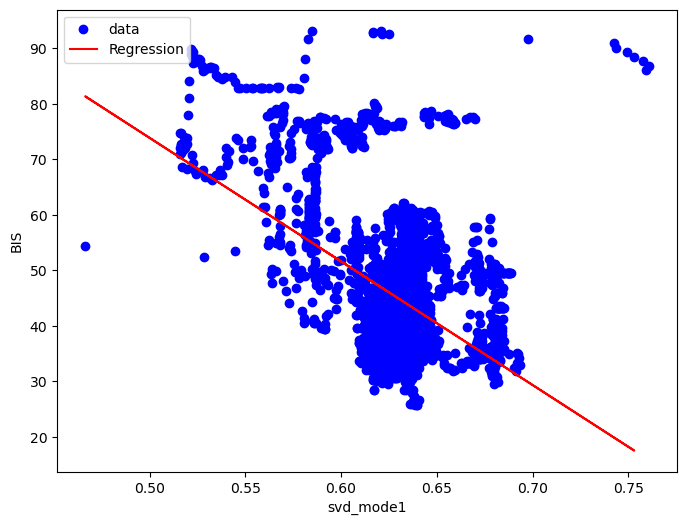

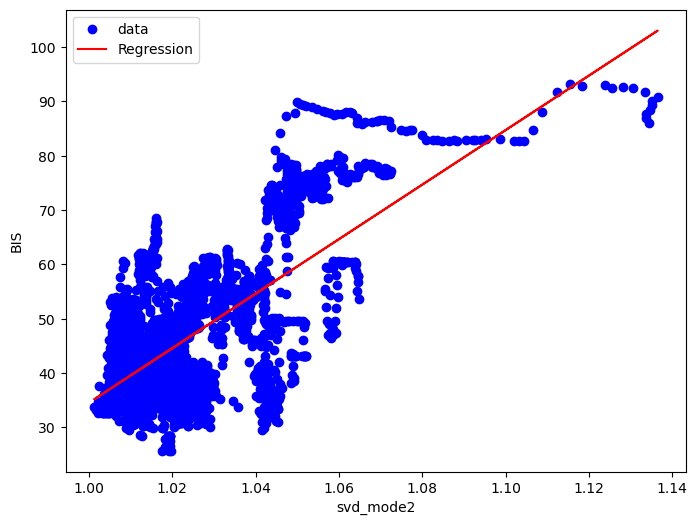

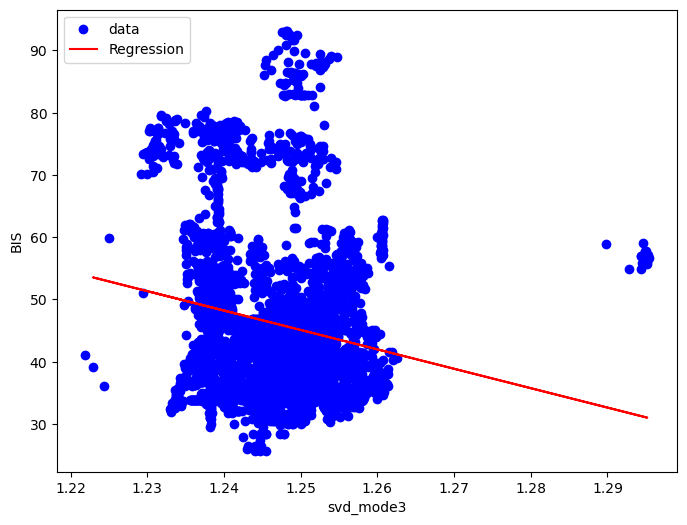

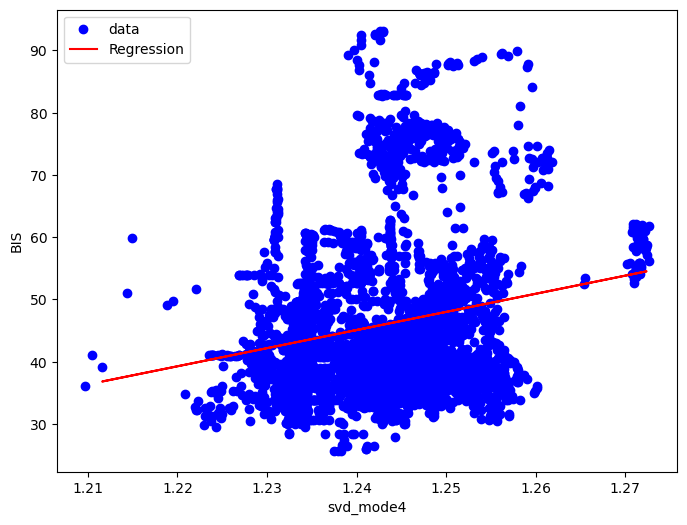

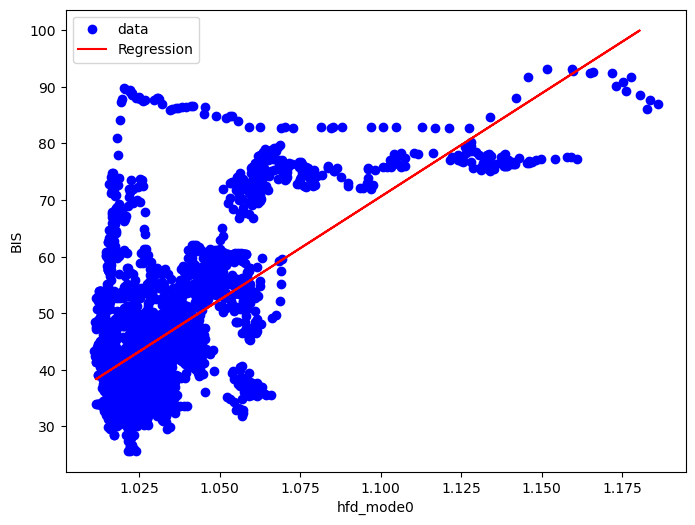

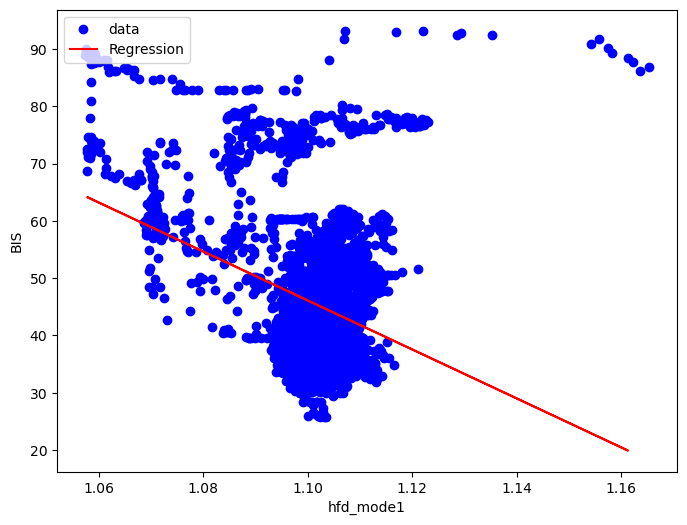

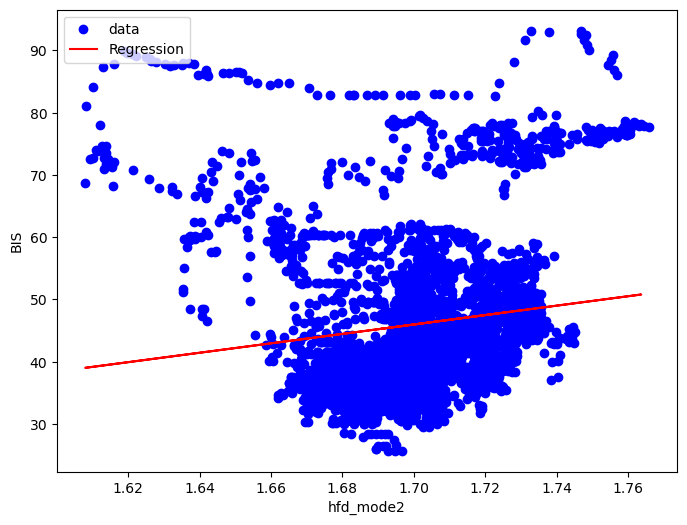

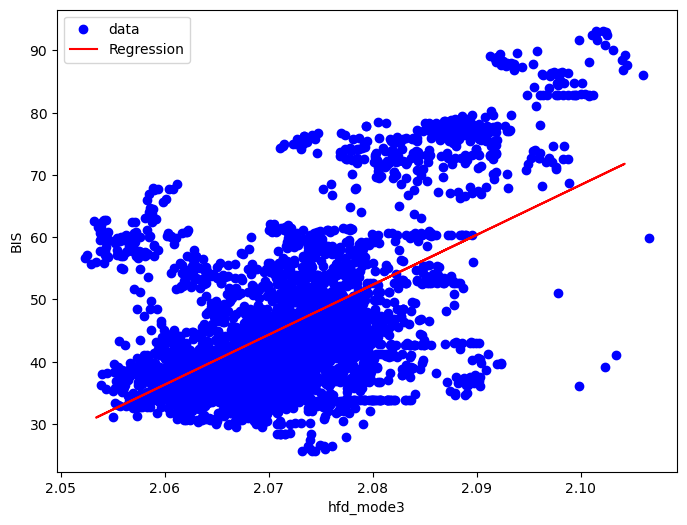

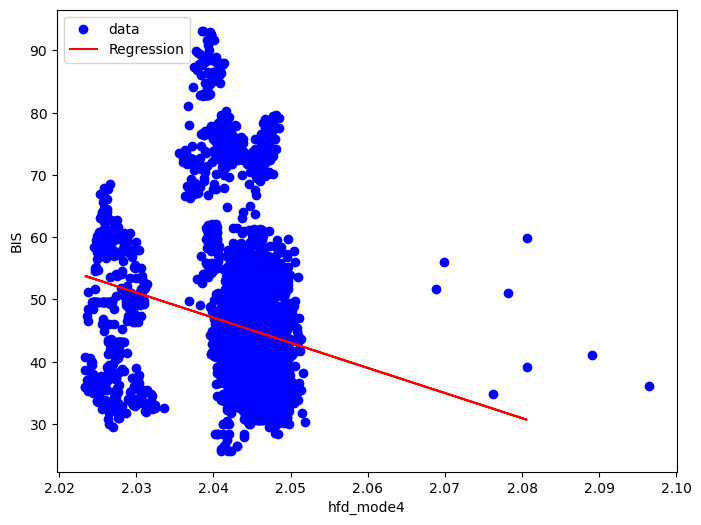

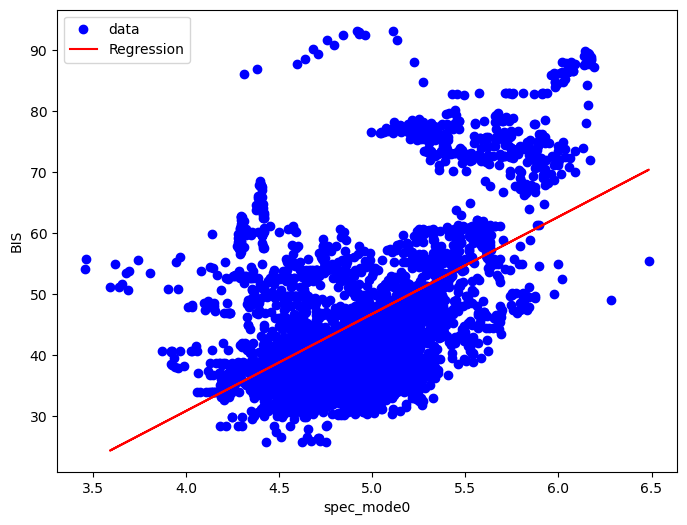

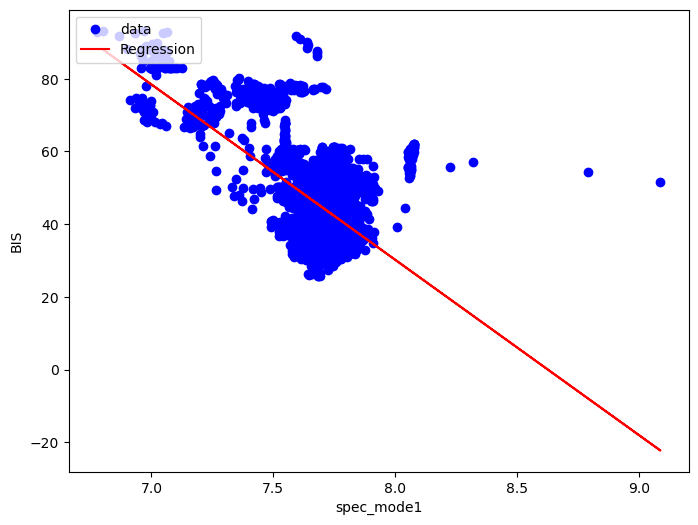

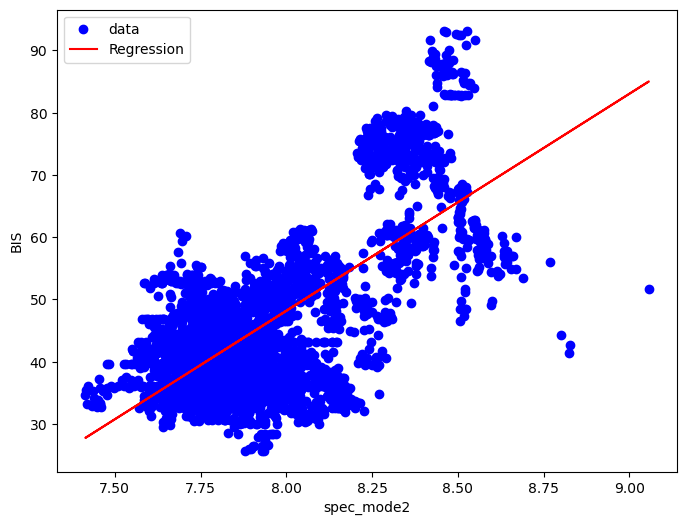

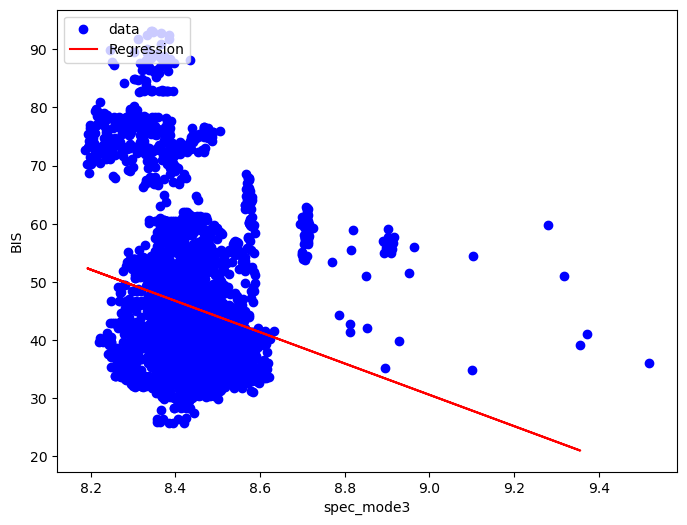

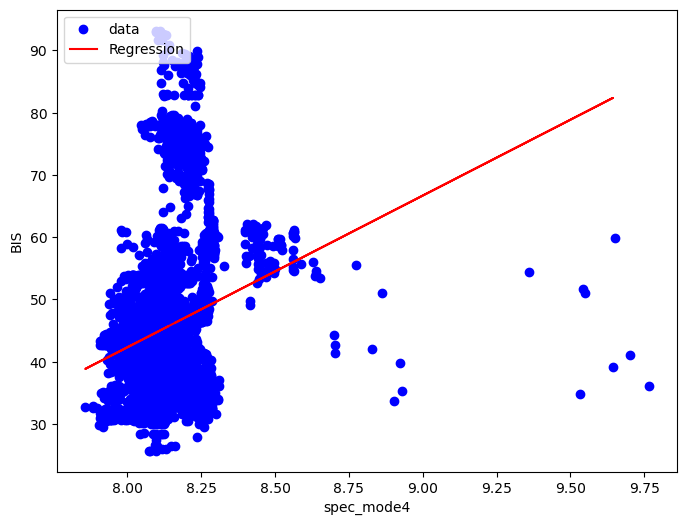

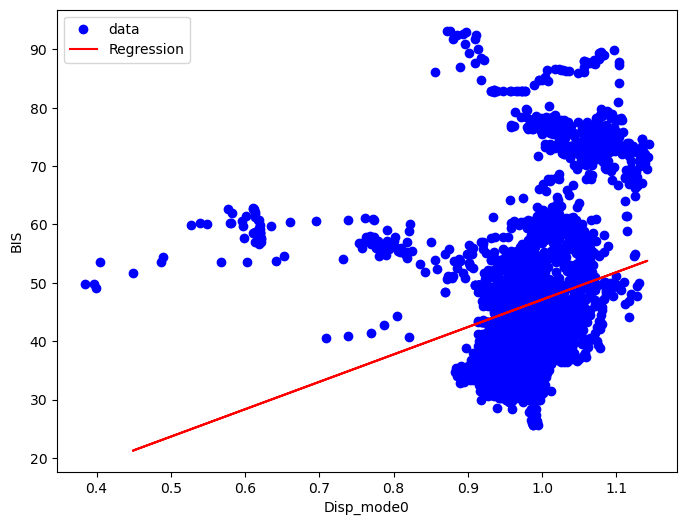

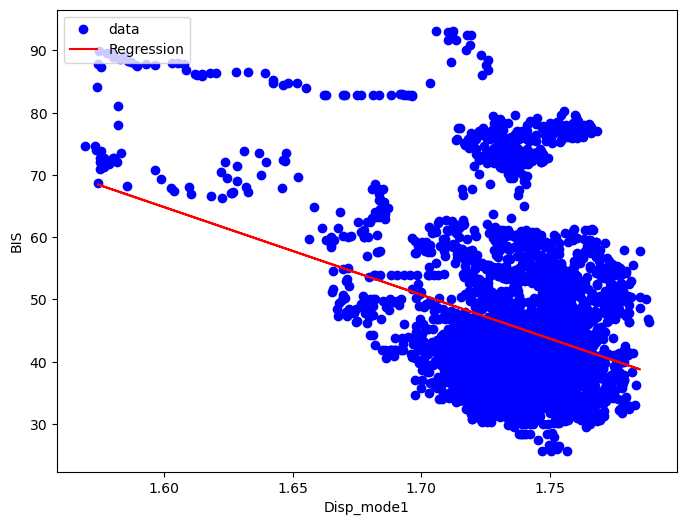

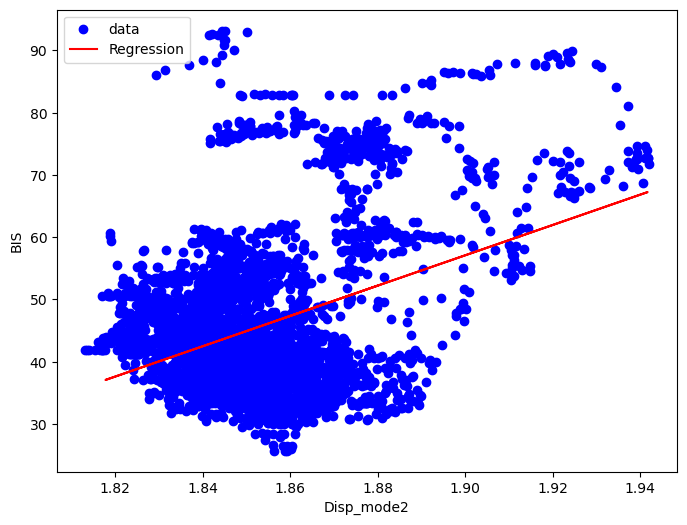

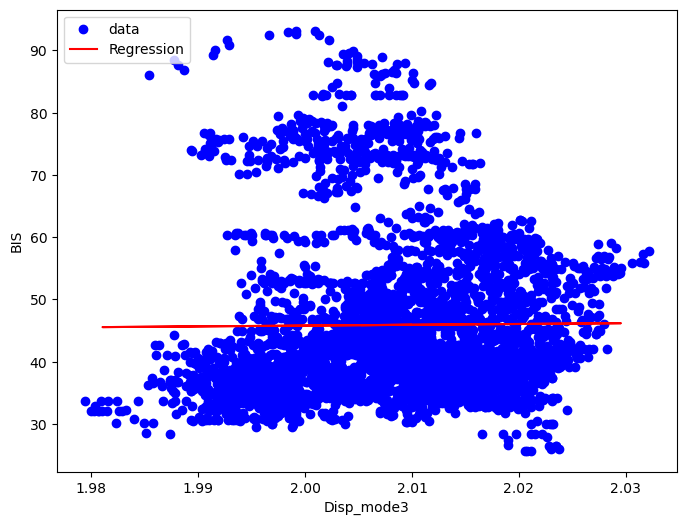

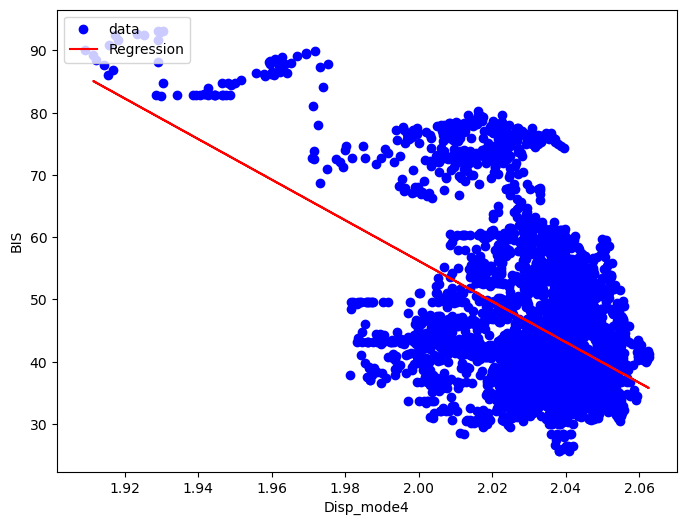

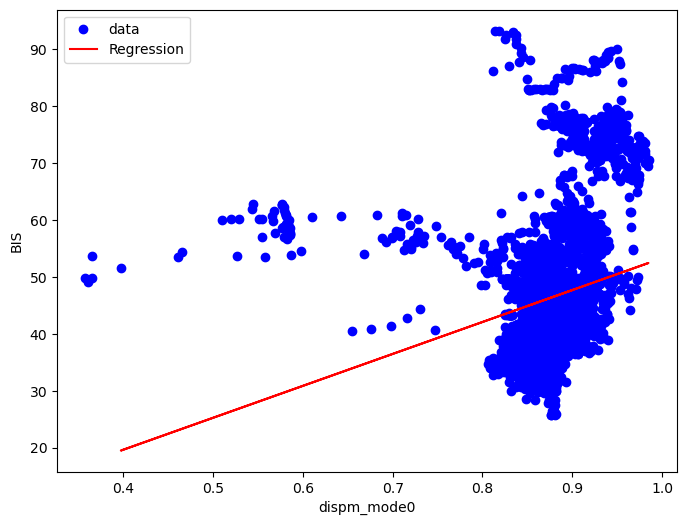

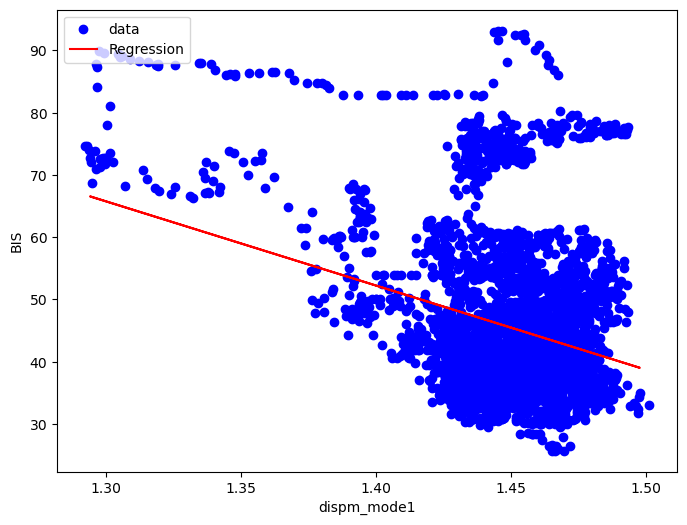

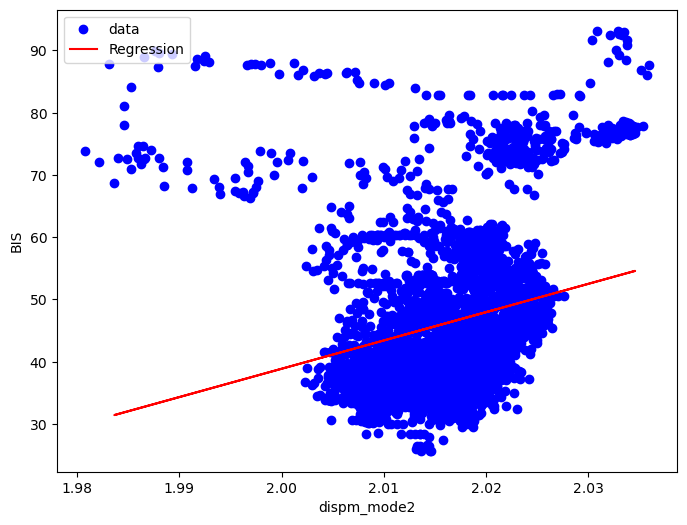

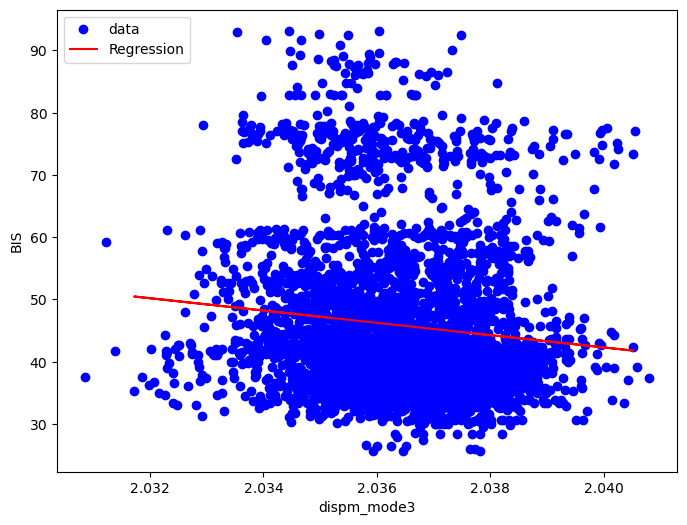

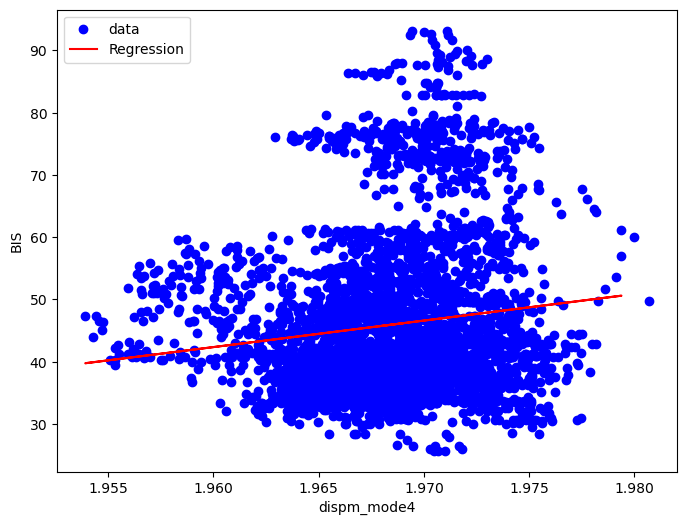

In [6]:

for column in patient_141.columns:
    if column == "BIS":
        continue
        
    plot_regression(patient_141, column)
    


In [7]:
# Metrics
total=pd.DataFrame({"Metrics": [key for key in metrics.keys()], "Values": [value*100 for value in metrics.values()]})

In [8]:
sort_total=total.sort_values('Values', ascending=False)
sort_total

,Metrics,Values
34,lzc_mode4_r2,67.805916
33,lzc_mode3_r2,62.366097
22,Perment_mode2_r2,54.031077
27,pet_mode2_r2,53.804107
15,detf_mode0_r2,48.599872
47,spec_mode2_r2,43.026221
7,hc_mode2_r2,42.343074
20,Perment_mode0_r2,41.746213
40,hfd_mode0_r2,41.735381
37,svd_mode2_r2,40.158654


### Radom forest feature selection

In [9]:


# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Display the feature importances
print(feature_importances_df)

# Select the top k features (e.g., top 10 features)
k = 10
selected_features = feature_importances_df.head(k)['feature'].tolist()

# Use only the selected features for further analysis or modeling
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


          feature  importance
34      lzc_mode4    0.690126
40      hfd_mode0    0.071438
43      hfd_mode3    0.026979
52     Disp_mode2    0.017175
33      lzc_mode3    0.012798
37      svd_mode2    0.011334
13      kfd_mode3    0.009779
14      kfd_mode4    0.009594
0        hm_mode0    0.007796
10      kfd_mode0    0.006890
12      kfd_mode2    0.006043
53     Disp_mode3    0.006023
5        hc_mode0    0.005697
21  Perment_mode1    0.005445
39      svd_mode4    0.005219
23  Perment_mode3    0.005032
36      svd_mode1    0.004958
42      hfd_mode2    0.004762
35      svd_mode0    0.004746
8        hc_mode3    0.004679
26      pet_mode1    0.004487
46     spec_mode1    0.003996
54     Disp_mode4    0.003968
7        hc_mode2    0.003833
6        hc_mode1    0.003696
15     detf_mode0    0.003665
2        hm_mode2    0.003299
16     detf_mode1    0.003187
32      lzc_mode2    0.002731
3        hm_mode3    0.002721
29      pet_mode4    0.002500
38      svd_mode3    0.002474
41      hf